




































































# Y a t il une difference d'évolution (de M6 à M36) de l'épaisseur corticale entre les régions plus deconnectées et les région moins deconnectées ?
(Les déconnections étant quantifiées en terme de projections corticales des faisceaux par unité de surface (triangle)

In [1]:
!pip install nipype
#!pip install brainspace
#!pip install seaborn
#!pip install nbcommands

In [2]:
import os, sys, glob
import pydicom as dcm
import pandas as pd
import matplotlib.pyplot as plt #graphiques
from nipype.interfaces.dcm2nii import Dcm2niix
import numpy as np
import matplotlib as plt
import nibabel as nb
from nibabel.freesurfer.mghformat import load
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69
import nibabel.freesurfer as nifs
import seaborn as sns
from scipy.stats import linregress
%matplotlib inline
import scipy.stats as stats

In [3]:
STUDY_PATH="/NAS/tupac/protocoles/Strokdem/"
TS_PATH=os.path.join(STUDY_PATH,"TractSeg")
OUT_PATH=os.path.join(TS_PATH,"data","disconn")
CODE_DIR=os.path.join(TS_PATH,"code")
LOG_DIR=os.path.join(CODE_DIR,"log")

## Echelle individuelle

### patient exemple : 851225EM à M6 

### Carte d'épaisseur corticale (projeté dans fsaverage, et sans smoothing) 

Remarque(s)
les freesurfers sont dispatchés dans 3 repertoires :

    FS51_DIR="/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/"
    LD_DIR="/NAS/tupac/protocoles/Strokdem/Radiomique_SB_LoicDuron_2021/FreeSurfer_Output/"
    RL_DIR="/NAS/deathrow/renaud/dti_disconnection/bids_proc/freesurfer/"

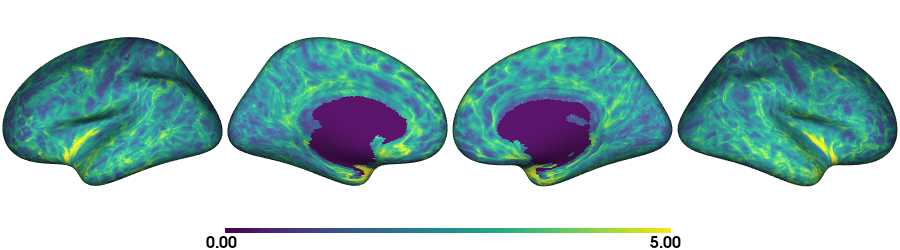

In [4]:
lh_surface_file='/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/lh.inflated'#/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/lh.inflated'
lh_surface_data = read_surface(lh_surface_file, itype='fs')
data=nifs.io.read_geometry(lh_surface_file)
#print(str(len(data[0])))

rh_surface_file='/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/rh.inflated'#/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/rh.inflated'
rh_surface_data = read_surface(rh_surface_file, itype='fs')
data=nifs.io.read_geometry(rh_surface_file)
#print(str(len(data[0])))

lh_dis_file= '/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/lh.thickness.fsaverage.mgh'
data=nifs.io.read_morph_data(lh_dis_file)
#print(str(len(data)))

rh_dis_file = '/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/rh.thickness.fsaverage.mgh'
data=nifs.io.read_morph_data(rh_dis_file)
#print(str(len(data)))

th_fs5 = np.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))

#print(th_fs5.shape)

plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

### Carte d'épaisseur corticale (projeté dans fsaverage, et smoothée à 10) 

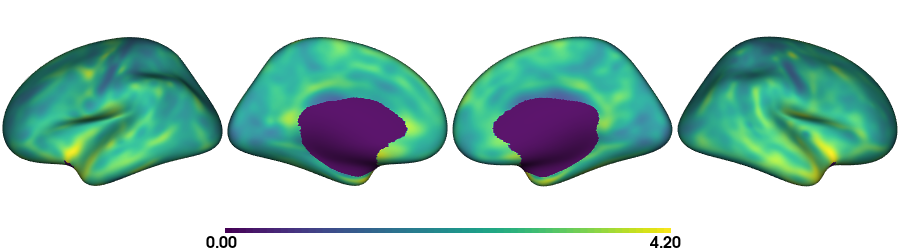

In [5]:
lh_dis_file= '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_lh.thickness.10.mgh'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_rh.thickness.10.mgh'

th_fs5 = np.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))

plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

In [6]:
th_fs5.shape

(1, 327684)

### Carte des deconnexions (projeté dans fsaverage, et sans smoothing) après tractographie cerveau entier et calcul des fibres intersectant avec la lésion

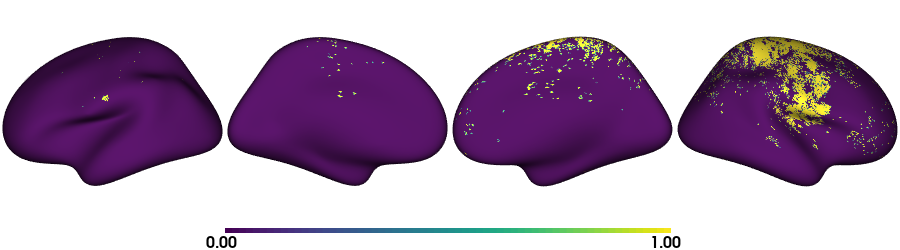

In [6]:
lh_dis_file= '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_lh.disconnection.00.mgh'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_rh.disconnection.00.mgh'
th_fs5 = np.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))
plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)


### Carte des deconnexions (projeté dans fsaverage, et smoothée à 10) 

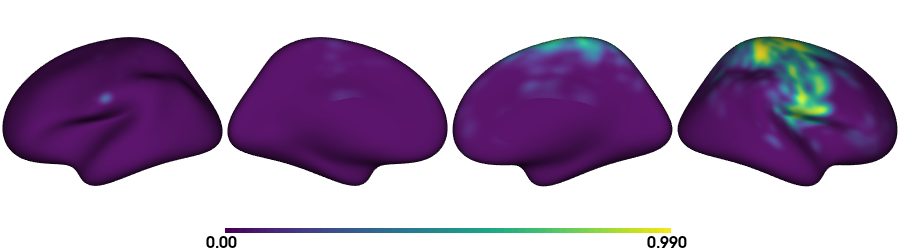

In [7]:
lh_dis_file= '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_lh.disconnection.10.mgh'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/851225EM_M6_rh.disconnection.10.mgh'
th_fs5 = np.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))
plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

## Echelle du groupe 

### Somme des cartes de deconnexions (projeté dans fsaverage, et sans smoothing) 

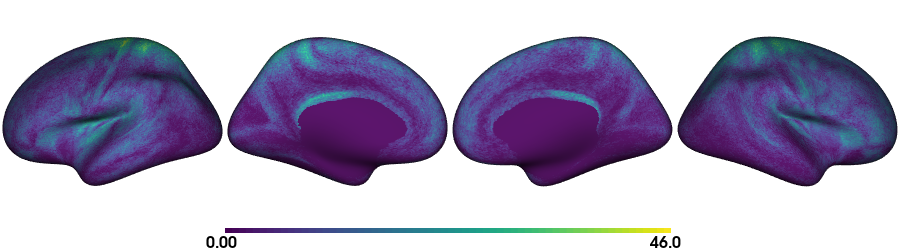

In [8]:
lh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_lh.disconnection.00.sum.mgh'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_rh.disconnection.00.sum.mgh'

th_fs5 = np/home/global/freesurfer7.4.1/bin/freeview -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/lh.inflated:/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/lh.thickness.fsaverage.mgh:overlay_threshold=0,5 -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/rh.inflated:overlay=/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/rh.thickness.fsaverage.mgh:overlay_threshold=0,5 --viewport 3/home/global/freesurfer7.4.1/bin/freeview -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/lh.inflated:/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/lh.thickness.fsaverage.mgh:overlay_threshold=0,5 -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/rh.inflated:overlay=/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/rh.thickness.fsaverage.mgh:overlay_threshold=0,5 --viewport 3/home/global/freesurfer7.4.1/bin/freeview -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/lh.inflated:/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/lh.thickness.fsaverage.mgh:overlay_threshold=0,5 -f /NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/fsaverage/surf/rh.inflated:overlay=/NAS/tupac/protocoles/Strokdem/FS5.1_T2mask/851225EM_M6/surf/rh.thickness.fsaverage.mgh:overlay_threshold=0,5 --viewport 3.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))

plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

### Somme des cartes de deconnexions (projeté dans fsaverage, smoothée à 10) 

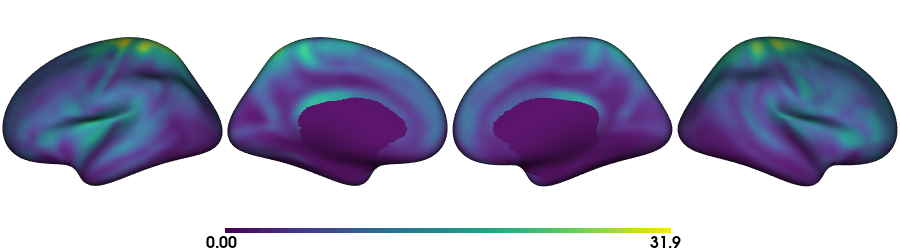

In [37]:
lh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_lh.disconnection.10.sum.mgh'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_rh.disconnection.10.sum.mgh'

th_fs5 = np.hstack(np.concatenate((np.array(load(lh_dis_file).get_fdata()),
                                   np.array(load(rh_dis_file).get_fdata())), axis=0))

plot_hemispheres(lh_surface_data, rh_surface_data, array_name=th_fs5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

### Extraction de clusters

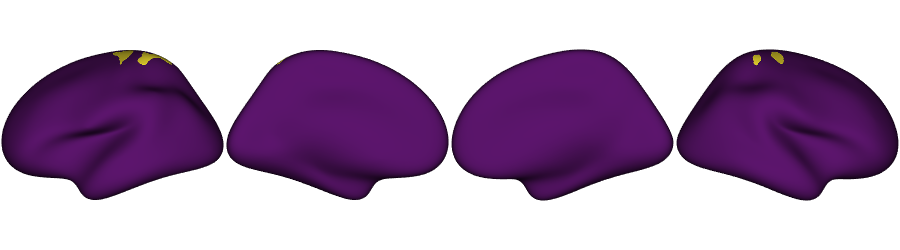

In [45]:
lh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_lh.disconnection.5.sum.cluster25.annot'
rh_dis_file = '/NAS/tupac/protocoles/Strokdem/TractSeg/CTsmoothed/M6_rh.disconnection.5.sum.cluster25.annot'
data1=nifs.io.read_annot(lh_dis_file)
data2=nifs.io.read_annot(rh_dis_file)
cluster_annot = np.hstack(np.concatenate((data1[0],data2[0]), axis=0))
plot_hemispheres(lh_surface_data, rh_surface_data, array_name=cluster_annot, size=(900, 250), zoom=1.25,share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

# Correlation du nombre de disconnections VS. l'atrophie de la matière grise dans le cluster principal 

In [65]:
res_data={
'SUBJ':[]
}

for LAT in ["lh","rh"]:
    for TIME in ["M6","M36"]:
        for TYPE in ["disconnection","thickness"]:
            for CLUSTER in ["cluster_1"]:
                res_data['_'.join([LAT,TIME,TYPE,CLUSTER])]=[]

FILE=os.path.join(TS_PATH,'CTsmoothed',"M6_"+"rh"+".disconnection.10.sum.cluster25.annot")
cluster_annot_rh=nb.freesurfer.io.read_annot(FILE)
FILE=os.path.join(TS_PATH,'CTsmoothed',"M6_"+"lh"+".disconnection.10.sum.cluster25.annot")
cluster_annot_lh=nb.freesurfer.io.read_annot(FILE)
TIME_INIT="M36"
SMT="5"
LAT_INIT="rh"
for FILE in glob.glob(os.path.join(TS_PATH,'CTsmoothed',"*"+TIME_INIT+'_'+LAT_INIT+".disconnection."+SMT+".mgh")) :        
    if os.path.exists(FILE.replace("M36_","M6_")):
        SUBJ=os.path.basename(FILE).split('_')[0]
        #print(SUBJ)
        res_data.get('SUBJ').append(SUBJ)
        for TIME in ["M6","M36"]:
            for TYPE in ["disconnection","thickness"]:
                for CLUSTER in ["cluster_1"]:
                    TMP_F=os.path.join(TS_PATH,'CTsmoothed',SUBJ+'_'+TIME+"_rh."+TYPE+"."+SMT+".mgh")
                    data_data=nifs.mghformat.load(TMP_F).get_fdata()
                    #si c'est les deconnectiosn que je regarde je fais la somme dans le cluster
                    if TYPE=="disconnection" :
                        res_data.get('_'.join(['rh',TIME,TYPE,CLUSTER])).append(np.sum(data_data[cluster_annot_rh[0]==1])) 
                    #si c'est l'épaisseur corticale que je regarde je fais la moyenne dans le cluster
                    else :
                        res_data.get('_'.join(['rh',TIME,TYPE,CLUSTER])).append(np.mean(data_data[cluster_annot_rh[0]==1])) 

                    TMP_F=os.path.join(TS_PATH,'CTsmoothed',SUBJ+'_'+TIME+"_lh."+TYPE+"."+SMT+".mgh")
                    data_data=nifs.mghformat.load(TMP_F).get_fdata()                        
                    if TYPE=="disconnection" :
                        res_data.get('_'.join(['lh',TIME,TYPE,CLUSTER])).append(np.sum(data_data[cluster_annot_lh[0]==1]))        
                    else :
                        res_data.get('_'.join(['lh',TIME,TYPE,CLUSTER])).append(np.mean(data_data[cluster_annot_lh[0]==1]))        
                    
my_res=pd.DataFrame(res_data)
my_res['lh_thickness_cluster_1']=my_res['lh_M36_thickness_cluster_1']*100/my_res['lh_M6_thickness_cluster_1']
my_res['rh_thickness_cluster_1']=my_res['rh_M36_thickness_cluster_1']*100/my_res['rh_M6_thickness_cluster_1']
my_res

,SUBJ,lh_M6_disconnection_cluster_1,lh_M6_thickness_cluster_1,lh_M36_disconnection_cluster_1,lh_M36_thickness_cluster_1,rh_M6_disconnection_cluster_1,rh_M6_thickness_cluster_1,rh_M36_disconnection_cluster_1,rh_M36_thickness_cluster_1,lh_thickness_cluster_1,rh_thickness_cluster_1
0,731001LC,8.593105,1.936841,8.813372,1.951437,306.298627,1.984474,309.737653,1.943087,100.753622,97.914486
1,670806JPP,0.000000,1.836488,0.000000,1.818132,50.915812,1.948330,45.052918,1.776419,99.000467,91.176513
2,290318AB,14.394313,1.522808,3.802457,1.302389,0.000000,1.649222,0.000000,1.272658,85.525477,77.167156
3,680930WD,284.595984,1.623739,275.630253,1.869740,0.000000,1.780684,19.001878,1.816914,115.150238,102.034634
4,600816JLS,48.134156,2.064612,33.290915,2.160007,449.999205,1.854745,461.354754,1.715583,104.620465,92.496955
...,...,...,...,...,...,...,...,...,...,...,...
78,530512AS,1174.194809,1.786587,786.309482,1.671548,25.296541,1.976529,5.969913,1.887231,93.560976,95.482088
79,380614FS,760.676890,1.878093,589.608683,1.694975,0.000000,1.867305,0.000000,1.470397,90.249754,78.744343
80,490105RM,46.016476,2.209269,15.232665,2.071990,0.175212,2.227599,0.764735,2.137712,93.786207,95.964857
81,480920EF,89.630928,1.724461,16.696547,1.747058,0.000000,2.028028,0.000000,2.166701,101.310408,106.837796


### Affichage sous forme de distribution de la moyennne de l'epaisseur corticale dans le cluster à gauche et à droite aux temps M6 et M36

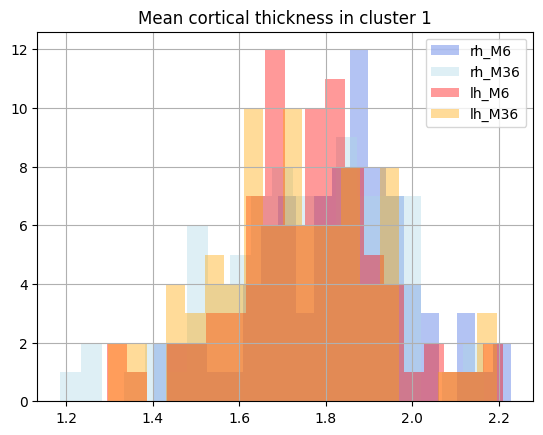

In [70]:
plt.pyplot.hist(my_res['rh_M6_thickness_cluster_1'],bins=20, color='royalblue', alpha=0.4, label='rh_M6')
plt.pyplot.hist(my_res['rh_M36_thickness_cluster_1'],bins=20, color='lightblue', alpha=0.4, label='rh_M36')
plt.pyplot.hist(my_res['lh_M6_thickness_cluster_1'],bins=20, color='red', alpha=0.4, label='lh_M6')
plt.pyplot.hist(my_res['lh_M36_thickness_cluster_1'],bins=20, color='orange', alpha=0.4, label='lh_M36')
plt.pyplot.title('Mean cortical thickness in cluster 1')
plt.pyplot.grid(True)
plt.pyplot.legend()

### Affichage sous forme de distribution de la somme des disconnections dans le cluster à gauche et à droite à M6 (temps utilisé pour trouver le cluster)

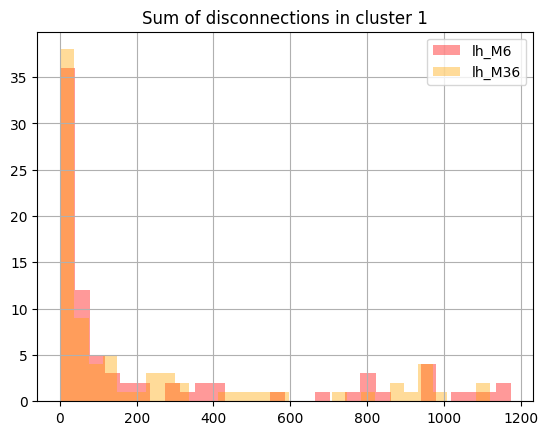

In [116]:
#plt.pyplot.hist(my_res['rh_M6_disconnection_cluster_1'],bins=30, color='royalblue', alpha=0.4, label='rh_M6')
#plt.pyplot.hist(my_res['rh_M36_disconnection_cluster_1'],bins=30, color='lightblue', alpha=0.4, label='rh_M36')
plt.pyplot.hist(my_res['lh_M6_disconnection_cluster_1'],bins=30, color='red', alpha=0.4, label='lh_M6')
plt.pyplot.hist(my_res['lh_M36_disconnection_cluster_1'],bins=30, color='orange', alpha=0.4, label='lh_M36')
plt.pyplot.title('Sum of disconnections in cluster 1')
plt.pyplot.grid(True)
plt.pyplot.legend()

### Analyse en corrélation dans le premier cluster extrait (dans l'hemisphere gauche et dans l'hemisphere droit) de l'influence des disconnections sur l'évolution de l'épaisseur corticale entre M6 et M36

-0.1137 0.306 0.0026
-0.0039 0.9721 0.0076


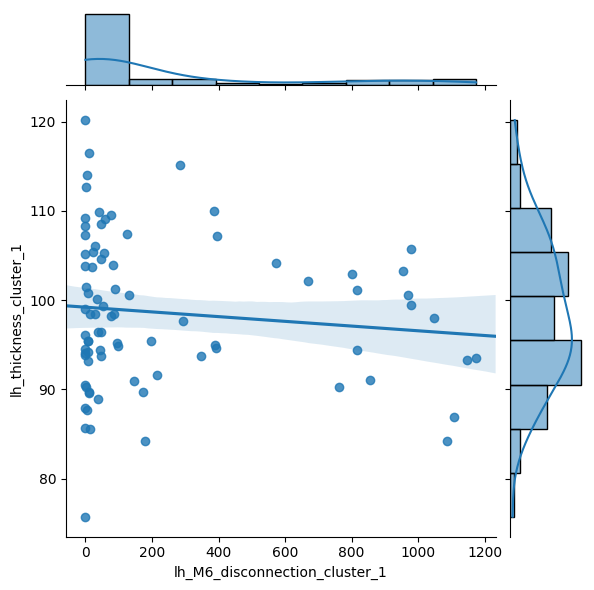

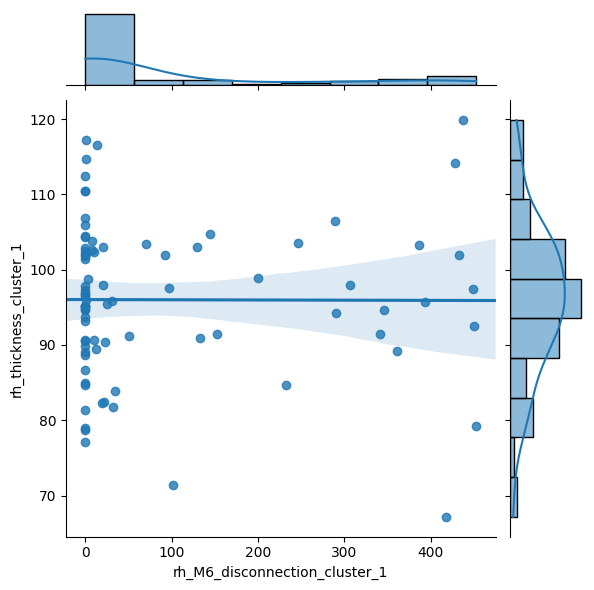

In [68]:
g = sns.jointplot(x='lh_M6_disconnection_cluster_1', y='lh_thickness_cluster_1',data=my_res,kind="reg", truncate=False)
slope, intercept, r, p, se = linregress(my_res.loc[:,'lh_M6_disconnection_cluster_1'],my_res.loc[:,'lh_thickness_cluster_1'])
print(np.round(r,4),np.round(p,4),np.round(se,4))

g = sns.jointplot(x='rh_M6_disconnection_cluster_1', y='rh_thickness_cluster_1',data=my_res,kind="reg", truncate=False)
slope, intercept, r, p, se = linregress(my_res.loc[:,'rh_M6_disconnection_cluster_1'],my_res.loc[:,'rh_thickness_cluster_1'])
print(np.round(r,4),np.round(p,4),np.round(se,4))

### Recherche d'un seul du nombre de disconnections dans le cluster permettant de mieux discriminer deux groupes  

In [111]:
for thres in range(0, 100, 10):
    t2, p2 = stats.ttest_ind(my_res[my_res['rh_M6_disconnection_cluster_1']<=thres]['rh_M6_thickness_cluster_1'],my_res[my_res['rh_M6_disconnection_cluster_1']>thres]['rh_M6_thickness_cluster_1'])
    print("(A droite) seuil :", thres,"T-value/p-value",np.round(t2,3),"/",np.round(p2,3))
    t2, p2 = stats.ttest_ind(my_res[my_res['lh_M6_disconnection_cluster_1']<=thres]['lh_M6_thickness_cluster_1'],my_res[my_res['lh_M6_disconnection_cluster_1']>thres]['lh_M6_thickness_cluster_1'])
    print("(A gauche) seuil :", thres,"T-value/p-value",np.round(t2,3),"/",np.round(p2,3))

(A droite) seuil : 0 T-value/p-value 0.021 / 0.984
(A gauche) seuil : 0 T-value/p-value 1.469 / 0.146
(A droite) seuil : 10 T-value/p-value 0.217 / 0.829
(A gauche) seuil : 10 T-value/p-value 1.69 / 0.095
(A droite) seuil : 20 T-value/p-value -0.451 / 0.653
(A gauche) seuil : 20 T-value/p-value 0.69 / 0.492
(A droite) seuil : 30 T-value/p-value -0.002 / 0.998
(A gauche) seuil : 30 T-value/p-value 0.855 / 0.395
(A droite) seuil : 40 T-value/p-value 0.632 / 0.529
(A gauche) seuil : 40 T-value/p-value 0.153 / 0.879
(A droite) seuil : 50 T-value/p-value 0.632 / 0.529
(A gauche) seuil : 50 T-value/p-value 0.652 / 0.516
(A droite) seuil : 60 T-value/p-value 0.807 / 0.422
(A gauche) seuil : 60 T-value/p-value 0.517 / 0.606
(A droite) seuil : 70 T-value/p-value 0.807 / 0.422
(A gauche) seuil : 70 T-value/p-value 0.517 / 0.606
(A droite) seuil : 80 T-value/p-value 0.594 / 0.554
(A gauche) seuil : 80 T-value/p-value 0.315 / 0.754
(A droite) seuil : 90 T-value/p-value 0.594 / 0.554
(A gauche) seu

### Visualisation de l'atrophie de la matière grise dans le cluster de l'hemisphere gauche en considérant deux groupes : GP1 moisn de 10 deconnections / GP2 plus de 10 deconnections 

10 1.69 0.095


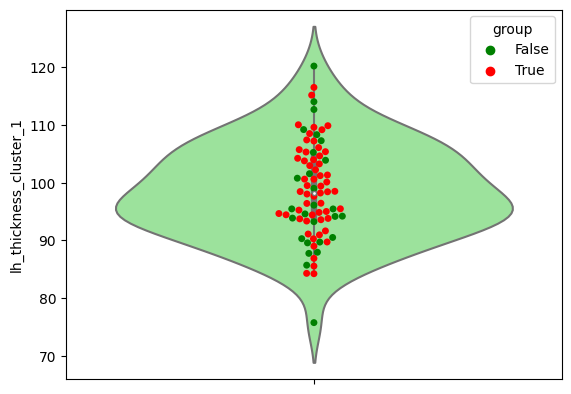

In [112]:
thres=10
my_res['group']=my_res['lh_M6_disconnection_cluster_1']>thres

sns.swarmplot(data=my_res,y="lh_thickness_cluster_1",hue='group',palette=['green','red'])
sns.violinplot(data=my_res,y='lh_thickness_cluster_1',split=True,hue='group',palette=['lightgreen','lightcoral'])

t2, p2 = stats.ttest_ind(my_res[my_res['lh_M6_disconnection_cluster_1']<=thres]['lh_M6_thickness_cluster_1'],my_res[my_res['lh_M6_disconnection_cluster_1']>thres]['lh_M6_thickness_cluster_1'])
print(thres,np.round(t2,3), np.round(p2,3))